In [104]:
import pandas as pd
import numpy as np
import math
import _pickle as cpickle
import re
import string
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from collections import defaultdict
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from textblob import TextBlob
tokenize=lambda doc:doc.lower().split(" ")
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix

In [100]:
d = defaultdict(LabelEncoder)

In [3]:
data = pd.read_csv("gender-info.csv", encoding="Latin-1")

In [4]:
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [5]:
data.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [19]:
datas = pd.read_csv("gender-info.csv",usecols= [0,5,6,19,17,21,10,11],encoding='latin1')

In [20]:
datas.head(2)

,_unit_id,gender,gender:confidence,description,fav_number,retweet_count,text,tweet_count
0,815719226,male,1.0,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964
1,815719227,male,1.0,I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471


In [21]:
print(list(datas))

['_unit_id', 'gender', 'gender:confidence', 'description', 'fav_number', 'retweet_count', 'text', 'tweet_count']


In [22]:
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

In [23]:
datas['Tweets'] = [cleaning(s) for s in datas['text']]
datas['Description'] = [cleaning(s) for s in datas['description']]


In [24]:
#stop = set(nltk.corpus.stopwords.words('english'))

In [25]:
datas['Tweets'] = datas['Tweets'].str.lower().str.split()

In [26]:
 #datas['Tweets'] = datas['Tweets'].apply(lambda x : [item for item in x if item not in stop])


In [27]:
datas.gender.value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [28]:

Male = data[data['gender'] == 'male']

In [29]:
Female = data[data['gender'] == 'female']

In [30]:
Male_Words = pd.Series(' '.join(Male['text'].astype(str)).lower().split(" ")).value_counts()[:20]

In [31]:
Male_Words.head(20)


the     4958
and     3945
to      1961
i       1801
a       1738
of      1413
you     1281
in      1155
for     1024
is      1003
on       802
it       686
my       638
         603
that     601
with     528
be       505
have     490
me       458
just     457
dtype: int64

In [32]:
Female_Words = pd.Series(' '.join(Female['text'].astype(str)).lower().split(" ")).value_counts()[:20] 

In [33]:
Female_Words.head(20)

the     4714
and     4643
i       2670
to      2268
a       1546
you     1443
of      1284
my      1232
in      1194
for     1116
is      1048
me       838
it       801
on       755
that     652
with     646
so       619
just     604
this     517
i'm      516
dtype: int64

In [34]:
Male_Words.to_csv('Male_words.csv')


In [35]:
Female_Words.to_csv('Female_Words.csv')


In [36]:

data_confident = datas[datas['gender:confidence']==1]


In [37]:
print(list(data_confident))

['_unit_id', 'gender', 'gender:confidence', 'description', 'fav_number', 'retweet_count', 'text', 'tweet_count', 'Tweets', 'Description']


In [38]:
print(list(datas))

['_unit_id', 'gender', 'gender:confidence', 'description', 'fav_number', 'retweet_count', 'text', 'tweet_count', 'Tweets', 'Description']


In [39]:

data_new = data_confident.filter(['Tweets','Description',' gender:confidence'], axis=1)

In [40]:
print(data_new)

                                                  Tweets  \
0      [robbie, e, responds, to, critics, after, win,...   
1      [ûïit, felt, like, they, were, my, friends, an...   
3      [hi, jordanspieth, looking, at, the, url, do, ...   
4      [watching, neighbours, on, sky, catching, up, ...   
5      [ive, seen, people, on, the, train, with, lamp...   
...                                                  ...   
20044  [need, a, ride, home, from, practice, ù, ôù, ô...   
20045  [lookupondeath, fine, and, i, ll, drink, tea, ...   
20046  [greg, hardy, you, a, good, player, and, all, ...   
20047  [you, can, miss, people, and, still, never, wa...   
20049  [i, think, for, my, apush, creative, project, ...   

                                             Description  
0                                  i sing my own rhythm   
1      i m the author of novels filled with family dr...  
3      mobile guy ers shazam google kleiner perkins y...  
4      ricky wilson the best frontman kaise

In [41]:
#data_new_confident = data_new[data_new['gender:confidence']==1]


In [42]:
vectorizer = CountVectorizer()

In [105]:
x = data_new.apply(lambda x: d[x.name].fit_transform(x))

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['list']

In [44]:
#data_confident = data_confident.apply(LabelEncoder().fit_transform)


In [45]:
 x = vectorizer.fit_transform(data_confident['text'])


In [46]:
encoder = LabelEncoder()

In [47]:
y = encoder.fit_transform(data_confident['gender'])


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)


In [49]:
print(x_train.shape)


(11140, 33868)


In [50]:
print(y_train.shape)


(11140,)


In [51]:
print(x_test.shape)


(2786, 33868)


In [52]:
print(y_test.shape)


(2786,)


In [53]:
print('<---------- Results with Logistic Regression ---------->')


<---------- Results with Logistic Regression ---------->


In [54]:
#datas['gender']=datas['gender'].reshape(-1,1)

In [55]:
logistic = LogisticRegression()



In [56]:
logistic.fit(x_train,y_train)


C:\Users\chakkara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
 y_test = np.asarray(y_test,dtype=int)


In [58]:
print('Variance % for Logistic Regression with : ' + str(logistic.score(x_test, y_test)*100) + ' %')


Variance % for Logistic Regression with : 56.24551328068917 %


In [59]:
print('<------------------------------------------------------->\n')


<------------------------------------------------------->



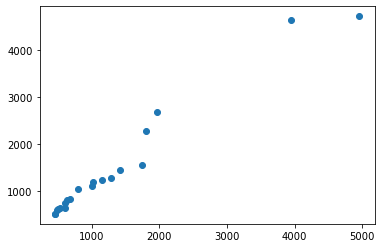

In [60]:
plt.scatter(Male_Words,Female_Words)

In [61]:
datas['txtlength']=datas['text'].map(lambda text:len(text))

In [62]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _unit_id           20050 non-null  int64  
 1   gender             19953 non-null  object 
 2   gender:confidence  20024 non-null  float64
 3   description        16306 non-null  object 
 4   fav_number         20050 non-null  int64  
 5   retweet_count      20050 non-null  int64  
 6   text               20050 non-null  object 
 7   tweet_count        20050 non-null  int64  
 8   Tweets             20050 non-null  object 
 9   Description        20050 non-null  object 
 10  txtlength          20050 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 1.7+ MB


In [63]:
datas.groupby('gender').describe()

_unit_id                                                        \
           count          mean          std          min           25%   
gender                                                                   
brand     5942.0  8.157288e+08  5544.367159  815719232.0  8.157247e+08   
female    6700.0  8.157301e+08  6153.328935  815719230.0  8.157245e+08   
male      6194.0  8.157294e+08  6207.569670  815719226.0  8.157236e+08   
unknown   1117.0  8.157293e+08  5818.658707  815719245.0  8.157247e+08   

                                                gender:confidence            \
                 50%           75%          max             count      mean   
gender                                                                        
brand    815728026.5  8.157329e+08  815756642.0            5942.0  0.868107   
female   815730768.5  8.157353e+08  815757985.0            6700.0  0.926360   
male     815729613.5  8.157347e+08  815757830.0            6194.0  0.905113   
unknown  815728657.0  8.157344e+08  815739581.0            1117.0  0.631267   

         ... tweet_count            txtlength                               \
         ...         75%        max     count        mean        std   min   
gender   ...                                                                 
brand    ...    58798.50  2372591.0    5942.0  100.782060  33.697089   8.0   
female   ...    29577.25  1125963.0    6700.0   95.002090  33.879774   6.0   
male     ...    30804.25  2680199.0    6194.0   98.885211  33.680376  12.0   
unknown  ...    43706.00   884279.0    1117.0   91.173679  34.644590  13.0   

                                    
          25%    50%    75%    max  
gender                              
brand    64.0  109.0  134.0  163.0  
female   68.0   97.0  126.0  425.0  
male     72.0  104.0  131.0  257.0  
unknown  54.0   92.0  125.0  169.0  

[4 rows x 48 columns]

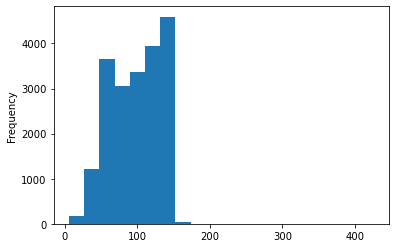

In [64]:
datas.txtlength.plot(bins=20,kind='hist')

In [65]:
datas.txtlength.describe()

count    20050.000000
mean        97.661796
std         33.931645
min          6.000000
25%         68.000000
50%        102.000000
75%        130.000000
max        425.000000
Name: txtlength, dtype: float64

In [66]:
print(list(datas.text[datas.txtlength>400]))

['When You A Trap Wife and Everybody wants you _Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷_']


In [67]:
print(list(datas.text[datas.txtlength<10]))

['#NAME?', 'The end.', 'And fever']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017CFC1C5D30>,
      dtype=object)

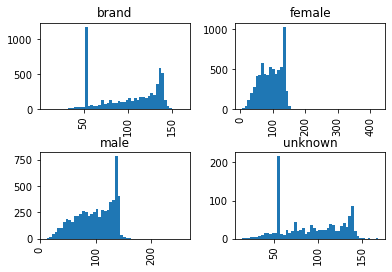

In [68]:
datas.hist(column='txtlength',by='gender',bins=50)

In [69]:
print(datas.groupby('gender').size())

gender
brand      5942
female     6700
male       6194
unknown    1117
dtype: int64


In [70]:
def split_into_tokens(text):           # convert bytes into proper unicode
     return TextBlob(text).words

In [71]:
def split_into_lemmas(text):
    text = text.lower()
    words = TextBlob(text).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]

In [72]:
# get a larger portion of the dataset to do the validation
twttop = datas.head(1000)

In [73]:
twttop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _unit_id           1000 non-null   int64  
 1   gender             994 non-null    object 
 2   gender:confidence  999 non-null    float64
 3   description        879 non-null    object 
 4   fav_number         1000 non-null   int64  
 5   retweet_count      1000 non-null   int64  
 6   text               1000 non-null   object 
 7   tweet_count        1000 non-null   int64  
 8   Tweets             1000 non-null   object 
 9   Description        1000 non-null   object 
 10  txtlength          1000 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 86.1+ KB


In [74]:
twt=twttop[twttop['gender'].notnull()]

In [75]:
twt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _unit_id           994 non-null    int64  
 1   gender             994 non-null    object 
 2   gender:confidence  994 non-null    float64
 3   description        873 non-null    object 
 4   fav_number         994 non-null    int64  
 5   retweet_count      994 non-null    int64  
 6   text               994 non-null    object 
 7   tweet_count        994 non-null    int64  
 8   Tweets             994 non-null    object 
 9   Description        994 non-null    object 
 10  txtlength          994 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 93.2+ KB


In [76]:
# Createbag of words from the 994 tweets from the top of the dataset
topbow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(twt['text'])
print (len(topbow_transformer.vocabulary_))

4866


In [109]:
twt_bow=topbow_transformer.transform(twt['text'])
print('sparse matrix shape:',twt_bow.shape)
print('no of non zeros:',twt_bow.nnz)
print('sparsity:%.2f%%'%(100.0*twt_bow.nnz/(twt_bow.shape[0]*twt_bow.shape[1])))

sparse matrix shape: (994, 4866)
no of non zeros: 15092
sparsity:0.31%


In [110]:
#carry out the real evaluation with this tweets
twt_train,twt_test,label_train,label_test=train_test_split(twt['text'],twt['gender'],test_size=0.6)
print(len(twt_train),len(twt_test),len(twt_train)+len(twt_test))

397 597 994


In [111]:
#gender distribution in sample
print(twt.groupby('gender').size())

gender
brand      281
female     326
male       337
unknown     50
dtype: int64


In [112]:
twt_train.head()

519    Very often we are our own worst enemy as we fo...
718    Shaw's highly-anticipated restaurant, The Dabn...
669                         @historyinflicks The Feelies
292    Colt here! Be sure to Nicole &amp; Colt Edward...
917    @hestiahdruid it was on the news back in 2010 ...
Name: text, dtype: object

In [113]:
#create a bag of words from the 400 tweets of the training set
trnbow_transformer=CountVectorizer(analyzer=split_into_lemmas).fit(twt_train)
print(len(trnbow_transformer.vocabulary_))

2383


In [114]:
train_bow=trnbow_transformer.transform(twt_train)
trn_tfidf_transformer=TfidfTransformer().fit(train_bow)
twt_train_tfidf=trn_tfidf_transformer.transform(train_bow)
print(twt_train_tfidf.shape)

(397, 2383)


In [115]:
%time twt_gender_detector=MultinomialNB().fit(twt_train_tfidf,label_train)

Wall time: 241 ms


In [116]:
test_bow=trnbow_transformer.transform(twt_test)
tst_tfidf_transformer=TfidfTransformer().fit(test_bow)
twt_test_tfidf=tst_tfidf_transformer.transform(test_bow)
print(twt_test_tfidf.shape)

(597, 2383)


In [117]:
predictions=twt_gender_detector.predict(twt_test_tfidf)
print(predictions)

['male' 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'female'
 'female' 'male' 'male' 'brand' 'female' 'male' 'female' 'male' 'male'
 'male' 'male' 'female' 'brand' 'female' 'male' 'male' 'female' 'male'
 'female' 'male' 'male' 'male' 'female' 'female' 'female' 'female'
 'female' 'female' 'female' 'male' 'male' 'brand' 'female' 'female' 'male'
 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'female'
 'brand' 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'female'
 'brand' 'female' 'female' 'brand' 'male' 'female' 'female' 'male' 'male'
 'male' 'brand' 'female' 'female' 'female' 'brand' 'female' 'male' 'brand'
 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'female'
 'female' 'male' 'brand' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'brand' 'male'
 'male' 'male' 'male' 'male' 'female' 'brand' 'female' 'male' 'male'
 'br

In [118]:
print('accuracy',accuracy_score(label_test,predictions))
print('confusion matrix\n',confusion_matrix(label_test,predictions))
print('(row=expected, col=predicted)')

accuracy 0.37520938023450584
confusion matrix
 [[34 56 82  0]
 [10 91 98  0]
 [17 88 99  0]
 [ 3 10  9  0]]
(row=expected, col=predicted)


In [119]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

       brand       0.53      0.20      0.29       172
      female       0.37      0.46      0.41       199
        male       0.34      0.49      0.40       204
     unknown       0.00      0.00      0.00        22

    accuracy                           0.38       597
   macro avg       0.31      0.29      0.28       597
weighted avg       0.39      0.38      0.36       597



C:\Users\chakkara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
